In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
df1 = pd.read_csv("df1.csv")
df2 = pd.read_csv("df2.csv")
df3 = pd.read_csv("df3.csv")

# df1.info()
# df2.info()
# df3.info()
# df1.describe(include="all")
# df2.describe(include="all")
# df3.describe(include="all")

In [3]:
df1.head()

,Unnamed: 0,country_code,country_name,country_continental,num_internet_plans,avg_price,min_price,max_price,avg_price_start_2021,avg_price_start_2020
0,0,IL,Israel,NEAR EAST,27.0,0.05,0.02,20.95,0.11,0.90
1,1,KG,Kyrgyzstan,CIS (FORMER USSR),20.0,0.15,0.10,7.08,0.21,0.27
2,2,FJ,Fiji,OCEANIA,18.0,0.19,0.05,0.85,0.59,3.57
3,3,IT,Italy,WESTERN EUROPE,29.0,0.27,0.09,3.54,0.43,1.73
4,4,SD,Sudan,SUB-SAHARAN AFRICA,33.0,0.27,0.03,0.92,0.63,0.68


In [4]:
df2.head()

,Unnamed: 0,country_name,avg_speed
0,0,Canada,75.18
1,1,South Korea,117.95
2,2,Netherlands,108.33
3,3,Japan,44.05
4,4,Norway,134.73


In [5]:
df3.head()

,Unnamed: 0,country_name,country_subregion,country_region,internet_users,population
0,0,China,Eastern Asia,Asia,1010740000,1427647786
1,1,India,Southern Asia,Asia,833710000,1352642280
2,2,United States,Northern America,Americas,312320000,327096265
3,3,Indonesia,South-eastern Asia,Asia,196000000,267670543
4,4,Brazil,South America,Americas,160010801,209469323


## 1 - Quantas empresas foram consultadas?

In [6]:
total_planos = df1.num_internet_plans.sum()
total_planos

6063.0

## 2 - Calcule a Variação percentual entre o preço médio da internet entre o início 2020 e 2021, usando como base o preço de 2021.

Essa pergunta não foi muito bem formulada e possui algumas interpretações possíveis.
Responderei: Variação percentual do preço médio no ínicio de 2020 para o preço médio no início de 2021.

In [7]:
print(f'Variação percentual: {df1.avg_price_start_2021.sum()/df1.avg_price_start_2020.sum()*100:.2f}%')
print(f'Ou seja, o preço em 2021 foi, em média, 61.38% do preço em 2020. Ou ainda, {100-61.38}% menor.')

Variação percentual: 61.38%
Ou seja, o preço em 2021 foi, em média, 61.38% do preço em 2020. Ou ainda, 38.62% menor.


## 3 - Calcule o preço médio geral da internet dos países que sejam da SOUTH AMERICA.

In [8]:
#df1.country_continental.value_counts()
df_SA = df1[df1["country_continental"]=="SOUTH AMERICA"] 
df_SA = df_SA.assign(total_price = df_SA.avg_price*df_SA.num_internet_plans)
avg_price_SA = df_SA.total_price.sum()/df_SA['num_internet_plans'].sum()
print(f'Preço médio: {avg_price_SA:.2f}')


Preço médio: 2.16


## 4 - Qual os 5 países que tem a maior taxa de usabilidade de internet em relação a população?

In [9]:
df3 = df3.assign(razao = df3.internet_users/df3.population)
df3.sort_values("razao", ascending=False).head(5).country_name

192    Faroe Islands
177          Andorra
198    Liechtenstein
94            Kuwait
162          Iceland
Name: country_name, dtype: object

## 5 - Faça um gráfico que mostre o número de países que apresentem uma taxa de usabilidade maior que 75% agrupados por Continente?

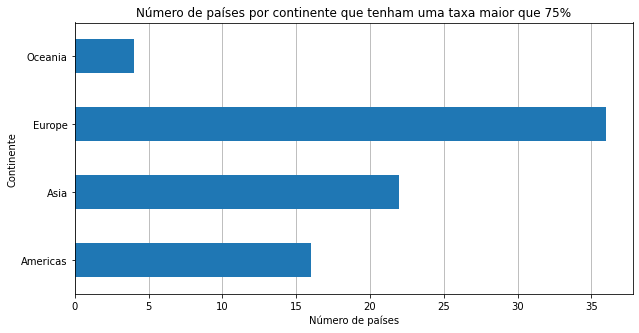

In [10]:
plt.figure(figsize=(10,5))
#sns.countplot(data=df3[df3['razao'] >= 0.75],x = 'country_region')
df3[df3.razao>=0.75].groupby("country_region").country_name.count().plot(kind="barh", zorder=2)
plt.title("Número de países por continente que tenham uma taxa maior que 75%")
plt.ylabel("Continente")
plt.xlabel("Número de países")
plt.grid(axis="x")
plt.show()

## 6 - Calcule a amplitude de preço entre os planos de internet.

In [11]:
df1 = df1.assign(amplitude_preco = df1.max_price - df1.min_price)
df1

,Unnamed: 0,country_code,country_name,country_continental,num_internet_plans,avg_price,min_price,max_price,avg_price_start_2021,avg_price_start_2020,amplitude_preco
0,0,IL,Israel,NEAR EAST,27.0,0.05,0.02,20.95,0.11,0.90,20.93
1,1,KG,Kyrgyzstan,CIS (FORMER USSR),20.0,0.15,0.10,7.08,0.21,0.27,6.98
2,2,FJ,Fiji,OCEANIA,18.0,0.19,0.05,0.85,0.59,3.57,0.80
3,3,IT,Italy,WESTERN EUROPE,29.0,0.27,0.09,3.54,0.43,1.73,3.45
4,4,SD,Sudan,SUB-SAHARAN AFRICA,33.0,0.27,0.03,0.92,0.63,0.68,0.89
...,...,...,...,...,...,...,...,...,...,...,...
219,225,MW,Malawi,SUB-SAHARAN AFRICA,5.0,25.46,20.37,25.46,27.41,3.59,5.09
220,226,ST,São Tomé and Príncipe,SUB-SAHARAN AFRICA,16.0,30.97,13.27,121.65,28.26,5.33,108.38
221,227,SH,Saint Helena,SUB-SAHARAN AFRICA,4.0,39.87,38.57,51.42,52.50,6.04,12.85
222,228,FK,Falkland Islands,SOUTH AMERICA,4.0,44.56,29.71,82.26,40.41,55.47,52.55


In [12]:
print(f'Amplitude_preço_geral: {df1.max_price.max()-df1.min_price.min()}. Maior preço: {df1.max_price.max()}. Menor preço: {df1.min_price.min()}')
print('Menor preço igual a zero pode ser devido a um erro do dataset ou alguma promoção de gratuidade durante um certo período.')

Amplitude_preço_geral: 768.87. Maior preço: 768.87. Menor preço: 0.0
Menor preço igual a zero pode ser devido a um erro do dataset ou alguma promoção de gratuidade durante um certo período.


## 7 - Usando somente o [seaborn](https://seaborn.pydata.org/) e [matplotlib](https://matplotlib.org/), construa um gráfico que mostre o valor médio, máximo e mínimo dos maiores preços para cada região.

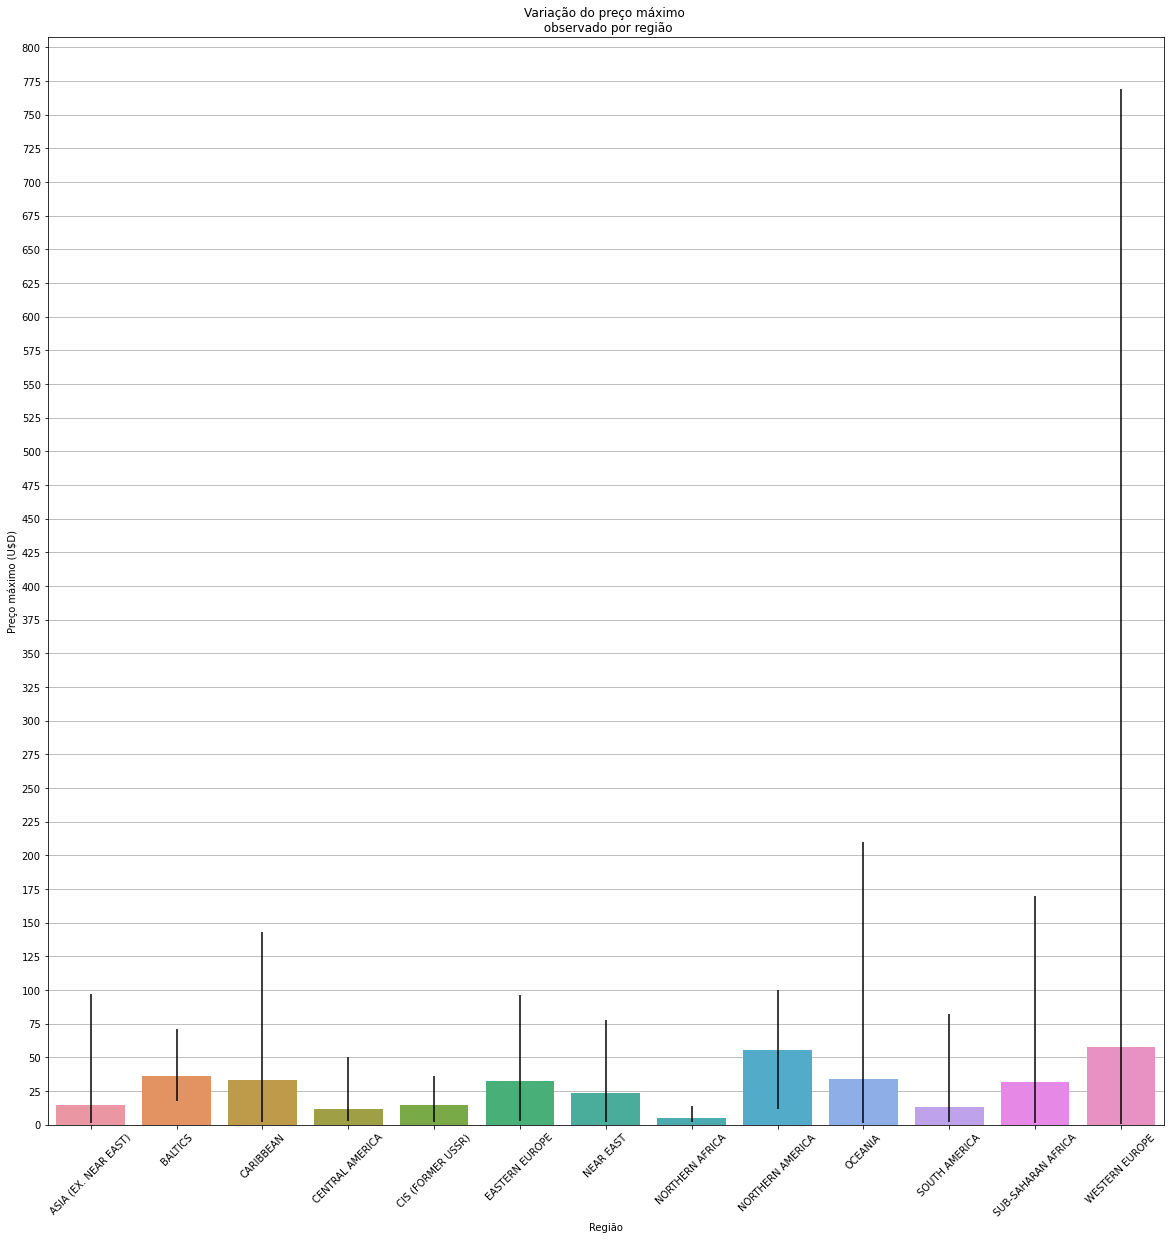

In [76]:
df = df1.groupby("country_continental").mean()
df_max_max = df1.groupby("country_continental").max()
df_min_max = df1.groupby("country_continental").min()
df = df.assign(max_max = df_max_max.max_price-df.max_price)
df = df.assign(min_max = df.max_price-df_min_max.max_price)
df = df.reset_index()
#xerr = df[['min_max','max_max']].T.to_numpy()

plt.figure(figsize=(20,20))
sns.barplot(data=df,x="country_continental",y="max_price", yerr = df[['min_max','max_max']].T.values, zorder=2)
plt.yticks(np.arange(0,801,25))
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.title('Variação do preço máximo \n observado por região')
plt.ylabel('Preço máximo (U$D)')
plt.xlabel('Região')
plt.show()

Onde a altura das barras representa a média, e as linhas vão do valor mínimo ao valor máximo.

## 8 - Supondo que a gente more no Reino Unido (United Kingdom), usando a velocidade média e o preço médio, quantos Dolares eu pagaria se utiliza-se uma hora de internet?

In [115]:
preco = df1[df1['country_name']=="United Kingdom"].iloc[0,5] #dolar/Gb
velocidade = df2[df2['country_name']=="United Kingdom"].iloc[0,2]* 0.000125 * 3600 #conversao em mbit em Gb e s em hora

print(f'Preço 1 hora internet: U$ {preco * velocidade:.2f}') #1hora

Preço 1 hora internet: U$ 30.74


## 9 - Utilizando os mesmos parâmetros da etapa anterior, supondo que você seja um dono de uma empresa que precisa instalar a internet no prédio e precisa fazer um orçamento. A empresa responsável disse que se você contratar um pacote até 50000Gb por dia é 300 Dolares, até 65000 é 350 Dolares e acima disso é 450 Dolares. Supondo que você tenha 300 funcionários, trabalhando 8 horas no dia, qual plano seria ideal para você?

In [116]:
velocidade = velocidade * 8
need = velocidade * 300
print(f'Gbs necessários: {need:.0f} Gb')

Gbs necessários: 51948 Gb


Precisaríamos do plano de 350 doláres.

## 10 - Somente com uma visualização gráfica, comparando o preço médio em 2020 e 2021, com uma linha de tendência (Gráfico identidade x = y), conclua se o preço médio da internet ficou mais barato ou caro de 2020 para 2021.

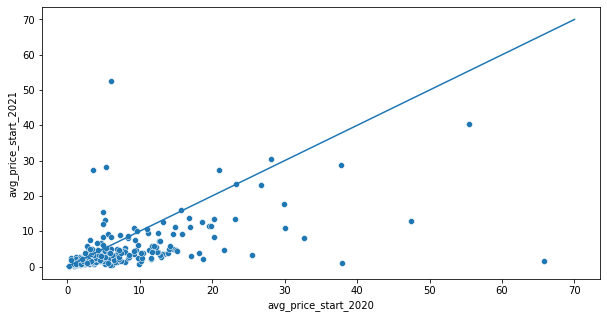

In [126]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df1, y="avg_price_start_2021", x="avg_price_start_2020")
sns.lineplot(x = [0,70], y = [0,70])
plt.show()

Como a maioria dos pontos estão abaixo da linha identidade, temos que em 2021 houve uma redução nos preços comparando com 2020.